In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams["figure.figsize"] = (20,10)

# LOAD DATA

In [94]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [57]:
df1.shape

(13320, 9)

In [58]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [59]:
df1['area_type'].unique() # area_type'ın kaç farklı özgün değeri var

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [60]:
df1['area_type'].value_counts()  # area_type'ın her özgün değerinin adeti

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

DROP FEATURES THAT NOT REQUIRED TO BULD OUR MODEL

In [95]:
df2 = df1.drop(['area_type', 'availability', 'society', "balcony",], axis = 'columns')
df2.shape

(13320, 5)

DATA CLEANING: HANDLING NA VALUES

In [62]:
df2.isnull().sum() # değişkenlerin geçersiz olan değerlerinin toplamı(her değerin kaç adet satırda geçersiz değeri var)

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

DROP ROWS WITH NA VALUE

In [96]:
df3 = df2.dropna()
df3.shape

(13246, 5)

In [64]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


FEATURE ENGINEERING : ADD NEW FEATURE FOR BHK

In [97]:
df3['bhk'] = df3["size"].apply(lambda x : int( x.split(' ')[0] ) )
df3.bhk.unique()

C:\Users\Z510\AppData\Local\Temp/ipykernel_7528/3614644888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3["size"].apply(lambda x : int( x.split(' ')[0] ) )


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [66]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [98]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [99]:
def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return ( float(tokens[0]) + float(tokens[1]) )/2
    try:
        return float(x)
    except:
        None

df4 = df3.copy()
df4['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)
df4.shape

(13246, 6)

In [101]:
df4 = df4[df4.total_sqft.notnull()]
df4.shape

(13200, 6)

In [70]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [102]:
df5 = df4.copy()
df5["price_per_sqft"] = df5["price"]*100000/df5["total_sqft"]
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [72]:
df5["price_per_sqft"].describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [103]:
location_stats = df5["location"].value_counts()
location_stats

Whitefield                   532
Sarjapur  Road               392
Electronic City              302
Kanakpura Road               264
Thanisandra                  232
                            ... 
Indiranagar HAL 2nd Stage      1
Maruthi HBCS Layout            1
K R C kothanur                 1
1Channasandra                  1
Abshot Layout                  1
Name: location, Length: 1298, dtype: int64

In [104]:
location_stats_less_than_10 = location_stats[location_stats<10]
location_stats_less_than_10

2nd Phase JP Nagar           9
Chandra Layout               9
Yemlur                       9
Kaverappa Layout             9
Banagiri Nagar               9
                            ..
Indiranagar HAL 2nd Stage    1
Maruthi HBCS Layout          1
K R C kothanur               1
1Channasandra                1
Abshot Layout                1
Name: location, Length: 1045, dtype: int64

In [108]:
df5.location = df5["location"].apply(lambda x: "other" if x in location_stats_less_than_10 else x)

OUTLIER REMOVAL BY USING BUSINESS LOGIC (total_sqft/bedrooms>= 300)

In [109]:
df6 = df5[ ~(df5['total_sqft']/df5['bhk']<300) ]
df6.shape

(12456, 7)

In [77]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [110]:
# her konumun price_per_sqft değeri ya  (o konumun price_per_sqft'lerinin aritmetik ortalaması - o konumun price_per_sqft'lerinin std sapmasından) 'dan küçük ya da (aritmetik ortalamasından + sapmasından)'dan büyük olsun

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for loc, loc_df in df.groupby("location"):
        m = np.mean(loc_df.price_per_sqft) # her konumun aritmetik ortalaması
        std = np.std(loc_df.price_per_sqft) # her konumun aritmetik oratalamadan ortalama sapması
        tuned_loc_df = loc_df[(loc_df.price_per_sqft > (m-std)) & (loc_df.price_per_sqft <= (m+std))]
        df_out = pd.concat([df_out, tuned_loc_df])
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10226, 7)

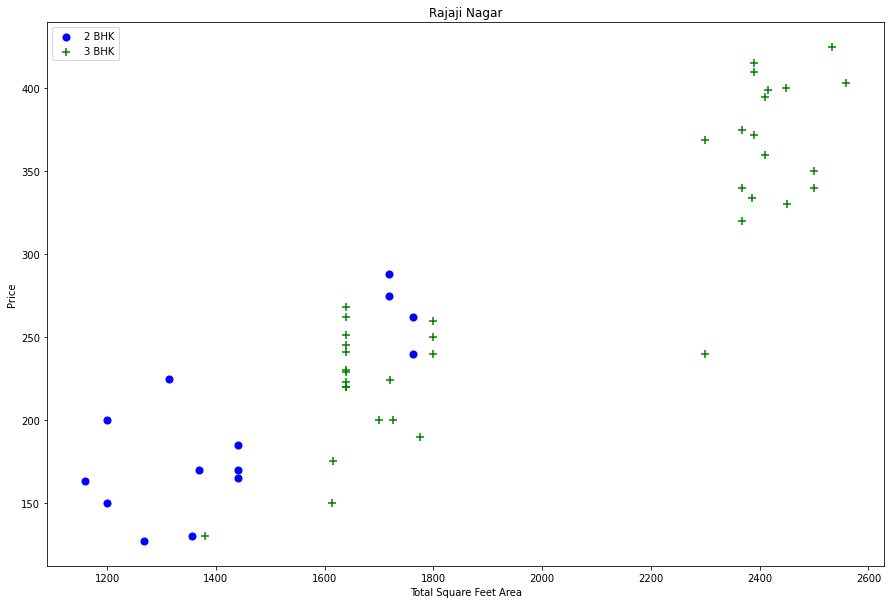

In [111]:
# fonksiyona df ve konum adı verelim.o bize df içinde o konumun 2 ve 3 yatak odalı df'lerini versin. bu df'lerin total_sqft ve price ile dağılımını çizsin
def plot_scatter_chart(df, location):
    bhk2 = df[ (df.location == location) & (df.bhk == 2) ]
    bhk3 = df[ (df.location == location) & (df.bhk == 3) ]
    plt.figure(figsize = (15,10))
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+', color = "green", label = "3 BHK", s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7, "Rajaji Nagar")

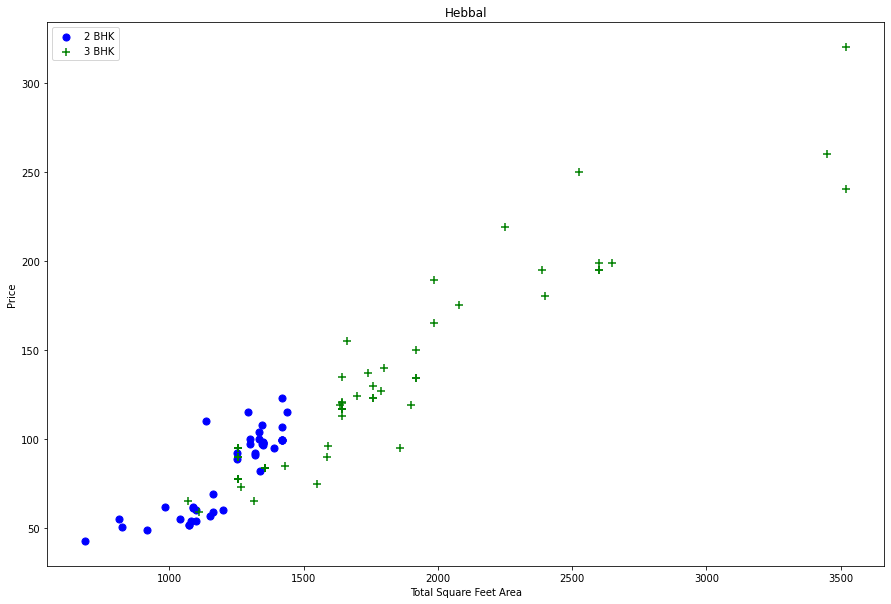

In [112]:
plot_scatter_chart(df7, "Hebbal")

In [113]:
# her konum için o konumun price_per_sqft'nin her değeri o konumun bir eksik yatak odalı olan değerlerinin aritmetik ortalamasından küçük olan değerlerinin indeksleri bul ve veri setinden at
def remove_bhk_outlier(df):
    exclude_indexes = np.array([])
    for loc, loc_df in df.groupby("location"):
        bhk_stats = {}
        for bhk, bhk_df in loc_df.groupby("bhk"):
            bhk_stats[bhk] = {
                "mean": np.mean(bhk_df.price_per_sqft),
                "std": np.std(bhk_df.price_per_sqft),
                "count": bhk_df.shape[0]
            }
        for bhk, bhk_df in loc_df.groupby("bhk"):
            prev_bhk_stats = bhk_stats.get(bhk-1)
            if prev_bhk_stats and prev_bhk_stats["count"] > 5:
                exclude_indexes = np.append(exclude_indexes ,( bhk_df[ (bhk_df.price_per_sqft ) < (prev_bhk_stats['mean']) ].index.values ) )

    return df.drop(exclude_indexes, axis = "index")

df8 = remove_bhk_outlier(df7)
df8.shape


(7380, 7)

In [82]:
df8.price_per_sqft

3281      8971.291866
3620      8514.285714
6120      8571.428571
341       3200.000000
2474      6916.666667
             ...     
10384    11206.896552
821       4765.730337
6881      5454.545455
8816      5500.000000
9683      5571.428571
Name: price_per_sqft, Length: 7509, dtype: float64

Text(0, 0.5, 'Count')

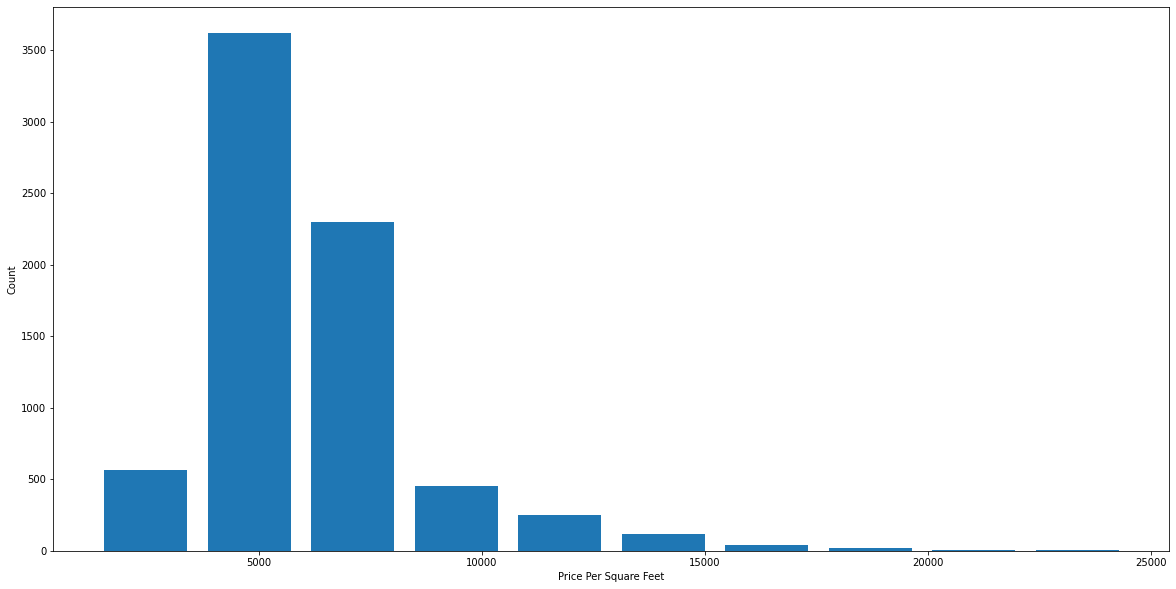

In [114]:
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

In [115]:
df8.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'count')

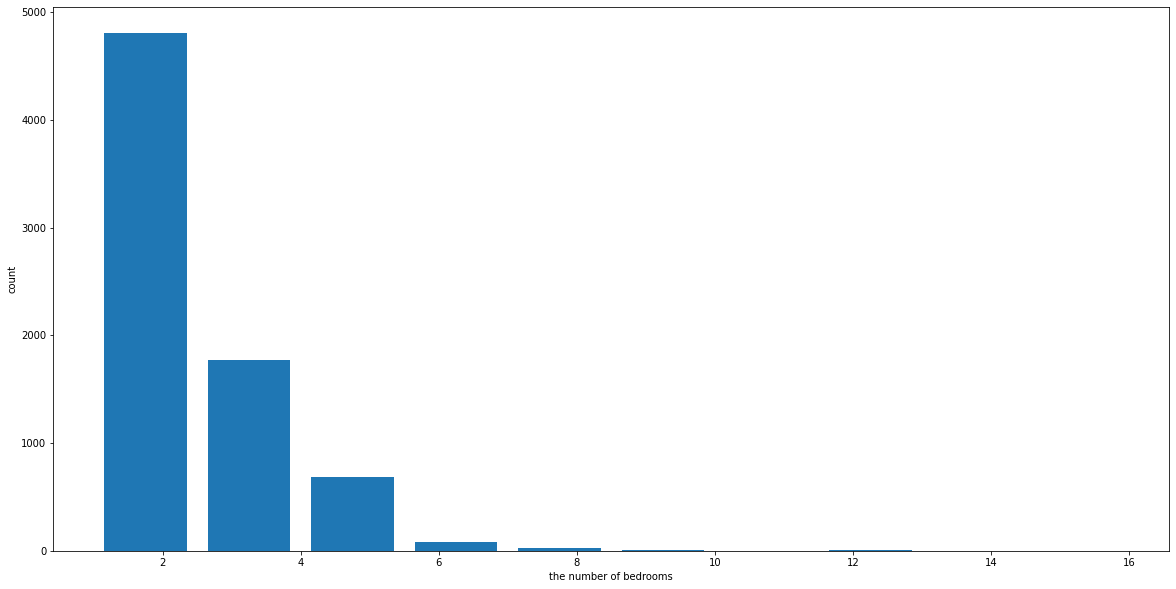

In [116]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("the number of bedrooms")
plt.ylabel("count")

In [117]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1078,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
8636,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
3096,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
3609,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
7979,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9935,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [118]:
df8[df8.bath > df8.bhk +2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1078,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
7709,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
11366,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
12103,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
2620,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [119]:
df9 = df8[df8.bath < df8.bhk + 2]
df9.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
341,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
2474,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667
5030,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419
5771,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.403509
6591,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,4540.654699


In [125]:
df10 = df9.drop(["price_per_sqft", "size"], axis = "columns")
df10.head()

,location,total_sqft,bath,price,bhk
341,Devarachikkanahalli,1250.0,2.0,40.0,2
2474,Devarachikkanahalli,1200.0,2.0,83.0,2
5030,Devarachikkanahalli,1170.0,2.0,40.0,2
5771,Devarachikkanahalli,1425.0,2.0,65.0,3
6591,Devarachikkanahalli,947.0,2.0,43.0,2


ONE HOT ENCODING FOR LOCATION

In [126]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
341,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2474,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5030,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5771,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6591,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
df11 = pd.concat([df10, dummies.drop("other", axis="columns")], axis="columns")
df11.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
341,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2474,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5030,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5771,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6591,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
df12 = df11.drop("location", axis = 'columns')
df12.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
341,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2474,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5030,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5771,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6591,947.0,2.0,43.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


BUILD A MODEL NOW

In [134]:
df12.shape

(7302, 257)

In [129]:
x = df12.drop(["price"], axis = "columns")
x.head()

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
341,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2474,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5030,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5771,1425.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6591,947.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
y = df12.price
y.head()

341     40.0
2474    83.0
5030    40.0
5771    65.0
6591    43.0
Name: price, dtype: float64

In [131]:
len(y)

7302

In [133]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_test, y_test)

0.8432266578791745

USE K_FOLD CROSS VALIDATION TO MEASURE ACCURACY OF OUR LinearRegression MODEL

In [135]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size= 0.2, random_state=0)

score_1 = cross_val_score(LinearRegression(), x, y, cv = cv)
score_1

array([0.84384221, 0.82909644, 0.83378618, 0.84849956, 0.81198277])

FIND THE BEST MODEL USING GridSearchCV

grid = GridSearchCV(model, model_params, cv)

grid.fit(x,y)

In [136]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_GridSearchCV(x,y):
    algos = {
        "linear_regression": {
            "model": LinearRegression(),
            "params": {
                "normalize": [True, False]
            }
        },
        "lasso": {
            "model": Lasso(),
            "params": {
                "alpha": [1,2],
                "selection": ["random", "cyclic"]
            }
        },
        "decision_tree": {
            "model": DecisionTreeRegressor(),
            "params": {
                "criterion": ["mse", "friedman_mse"],
                "splitter": ["best", "random"]
            }
        }   
    }

    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state=0)
    for algo, algo_stats in algos.items():
        grid = GridSearchCV(algo_stats["model"], algo_stats["params"], cv = cv, return_train_score=False)
        grid.fit(x,y)
        scores.append({
            "model": algo,
            "best_score": grid.best_score_,
            "best_params": grid.best_params_,
        })
    return pd.DataFrame(scores, columns = ["model", "best_score", "best_params"])

find_best_model_using_GridSearchCV(x,y)

c:\Users\Z510\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\Z510\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavi

,model,best_score,best_params
0,linear_regression,0.833441,{'normalize': True}
1,lasso,0.685283,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.715522,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


TEST THE MODEL(LinearRegression) FOR FEW PROPERTIES

In [139]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(x.columns == location)[0][0] # girdi olan konum kaçıncı sütunda

    my_x = np.zeros(len(x.columns))
    my_x[0] = sqft
    my_x[1] = bath
    my_x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return lr_clf.predict([my_x])

predict_price("Indira Nagar", 1000, 2, 2)


c:\Users\Z510\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([81.12725153])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [ ]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df1.shape

(13320, 9)

In [ ]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [ ]:
df1.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [ ]:
df1.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [ ]:
import pandas as pd
data = {
    'location': ['bursa', 'adana', 'trabzon', 'adıyaman', 'trabzon'],
    'yemek': ['köfte', 'kebab', 'hamsi tava', 'çiğköfte', 'kuymak']
}
df = pd.DataFrame(data)
#print(df)

for key, subdf in df.groupby('location'):
    print(key)
    print(subdf)

adana
  location  yemek
1    adana  kebab
adıyaman
   location     yemek
3  adıyaman  çiğköfte
bursa
  location  yemek
0    bursa  köfte
trabzon
  location       yemek
2  trabzon  hamsi tava
4  trabzon      kuymak


In [ ]:
def remove_bhk_outliers(df):
    outlier_indexes = np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                "mean": np.mean(bhk_df.price_per_sqft),
                "std": np.std(bhk_df.price_per_sqft),
                "count": bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby("bhk"):
            stats = bhk_stats[bhk-1]
            if stats["count"] > 5:
                outlier_indexes.append(bhk_df[bhk_df.price_per_sqft < stats["mean"]].index.values)
    return df.drop(outlier_indexes, axis = 'index')

df8 = remove_bhk_outliers(df7)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df1.shape

(13320, 9)

In [ ]:
df1.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [ ]:
df2 = df1.drop(["availability", "society", "area_type"], axis = 'columns')
df2.head()


,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [ ]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [ ]:
df3 = df2.dropna()
df3.shape

(12710, 6)

In [ ]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [ ]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(" ")[0]))
df3.head()

C:\Users\Z510\AppData\Local\Temp/ipykernel_12948/4018778724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(" ")[0]))


,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [ ]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

df3[~df3["total_sqft"].apply(is_float)]

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


In [ ]:
def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return ( float(tokens[0]) + float(tokens[1]) )/2
    try:
        return float(x)
    except:
        return None

df4 = df3.copy() 
df4.total_sqft = df4['total_sqft'].apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [ ]:
df5 = df4.copy()
df5["price_per_sqft"] = df5["price"]*100000/df5["total_sqft"]
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [ ]:
df5['price_per_sqft'].describe()

count    1.266800e+04
mean     6.876277e+03
std      2.263354e+04
min      2.678298e+02
25%      4.242721e+03
50%      5.376344e+03
75%      7.142857e+03
max      2.300000e+06
Name: price_per_sqft, dtype: float64

In [ ]:
import numpy as np
print( np.array(df5["location"].value_counts()))
location_stats = df5['location'].value_counts()
len(location_stats[location_stats<10])
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10


[513 372 300 ...   1   1   1]


Kalkere                 10
Nagappa Reddy Layout    10
Basapura                10
Doddaballapur           10
HAL 2nd Stage           10
                        ..
S R Layout               1
Meenakshi Layout         1
Vidyapeeta               1
Maruthi Extension        1
Abshot Layout            1
Name: location, Length: 1024, dtype: int64

In [ ]:
df5.location = df5["location"].apply(lambda x: "other" if x in location_stats_less_than_10 else x)
df5["location"].value_counts()[df5["location"].value_counts()<=10]

Series([], Name: location, dtype: int64)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df1["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [ ]:
df1.shape # (örnek sayısı, özellik sayısı) = (satır sayısı, sütun sayısı)

(13320, 9)

In [ ]:
df2 = df1.drop(["area_type", "availability", "society"], axis= "columns")
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [ ]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [ ]:
df2.shape

(13320, 6)

In [ ]:
df3 = df2.dropna()
df3.shape

(12710, 6)

In [ ]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(" ")[0]))
df3.head()

C:\Users\Z510\AppData\Local\Temp/ipykernel_8528/4018778724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(" ")[0]))


,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [ ]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
df3[~df3.total_sqft.apply(is_float)]

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


In [ ]:
def convert_sqft_to_num(x):
    tokens = x.split(" - ")
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4 = df4[df4['total_sqft'].notnull()]
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [ ]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [ ]:
location_stats = df5['location'].value_counts()
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Kalkere                 10
Nagappa Reddy Layout    10
Basapura                10
Doddaballapur           10
HAL 2nd Stage           10
                        ..
S R Layout               1
Meenakshi Layout         1
Vidyapeeta               1
Maruthi Extension        1
Abshot Layout            1
Name: location, Length: 1024, dtype: int64

In [ ]:
df5['location'].apply(lambda x: "other" if x in location_stats_less_than_10 else x)
len(df5['location'].unique())

1259

In [ ]:
df5.shape

(12668, 8)

In [ ]:
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [ ]:
df6 = df5[~(df5['total_sqft']/df5['bhk']<300)]
df6

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,10407.336319


In [ ]:
df6.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
def remove_pps_outliers(df):
    m = np.mean(df['price_per_sqft'])
    std = np.std(df['price_per_sqft'])
    return df[( df['price_per_sqft'] > (m-std) ) & ( df['price_per_sqft'] < (m+std) )]

df7 = remove_pps_outliers(df6)
df7.price_per_sqft.describe()

count    10896.000000
mean      5321.818765
std       1611.495600
min       2222.222222
25%       4106.280193
50%       5044.323289
75%       6303.772462
max      10169.491525
Name: price_per_sqft, dtype: float64

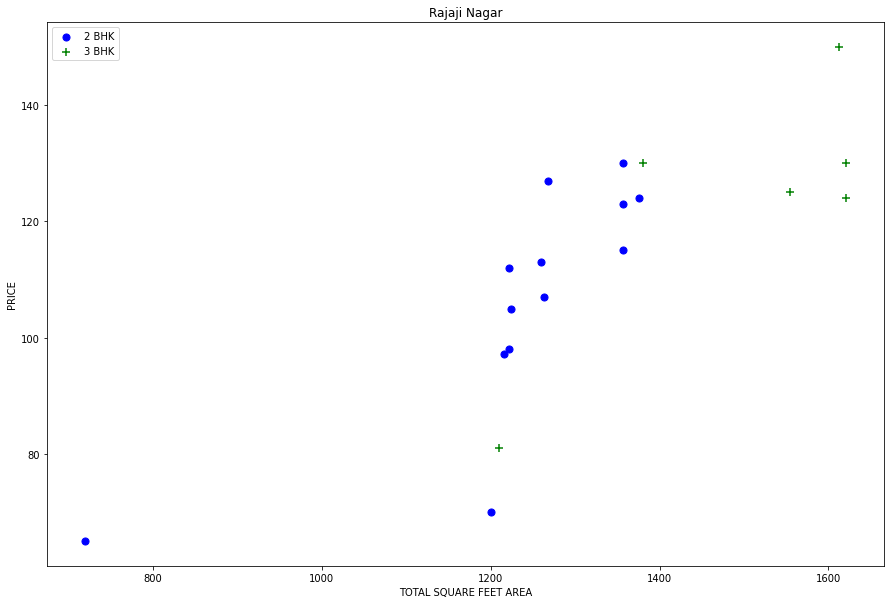

In [ ]:
def plot_scatter_chart(df, location):
    loc_bhk2 = df[(df.location == location) & (df.bhk == 2)]
    loc_bhk3 = df[ (df.location == location) & (df.bhk == 3)]
    plt.figure(figsize = (15,10))
    plt.scatter(loc_bhk2.total_sqft, loc_bhk2.price, color = 'blue', label = '2 BHK', s=50)
    plt.scatter(loc_bhk3.total_sqft, loc_bhk3.price, marker = "+", color = 'green', label = '3 BHK', s = 50)
    plt.xlabel("TOTAL SQUARE FEET AREA")
    plt.ylabel("PRICE")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7, "Rajaji Nagar")

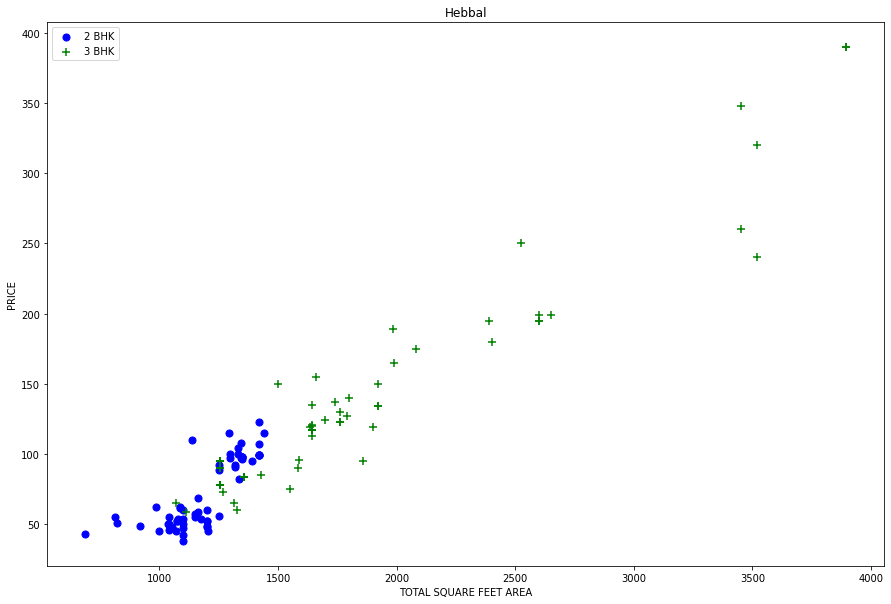

In [ ]:
plot_scatter_chart(df7, "Hebbal")

In [ ]:
def remove_bhk_outliers(df):
    outlier_indexes = np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                "mean": np.mean(bhk_df.price_per_sqft),
                "std": np.std(bhk_df.price_per_sqft),
                "count": bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby("bhk"):
            stats = bhk_stats[bhk-1]
            if stats["count"] > 5:
                outlier_indexes.append(bhk_df[bhk_df.price_per_sqft < stats["mean"]].index.values)
    return df.drop(outlier_indexes, axis = 'index')

df8 = remove_bhk_outliers(df7)
df8.shape

KeyError: 0

In [ ]:
def remove_bhk_outliers(df):
    exclude_indexes = []
    for loc, loc_df in df.groupby('location'): 
        bhk_stats = {}
        for bhk, bhk_df in loc_df.groupby('bhk'): # her location için bhk_stats'a bhk[2] bhk[3] ... gibi kilit elemanlar eklenir.
            bhk_stats[bhk]: {
                "mean": np.mean(bhk_df.price_per_sqft),
                "std": np.std(bhk_df.price_per_sqft),
                "count": bhk_df.shape[0],
                }
         # sonra burda o location için yine bhk ye göre işlemler yapılır.ilk for döngüsü ikinci döngüde bhk_stats'ı ikinci location için günceller.
        for bhk, bhk_df in loc_df.groupby("bhk"):
            previous_bhk_stats = bhk_stats.get(bhk-1)
            if previous_bhk_stats and previous_bhk_stats['count']>5:
                exclude_indexes.append(bhk_df[bhk_df.price_per_sqft < previous_bhk_stats["mean"]].index.values)
    return df.drop(exclude_indexes, axis = 'index')

        
    #bhk_stats = bhk_dict[bhk-1]
    #if bhk_stats['mean'] < bhk_dict[bhk]["mean"]:
        #exclude_indexes.append()
    return bhk_stats

df8 = remove_bhk_outliers(df7)
df8.shape

(10896, 8)

In [ ]:
bhk_stats = {
    "mean": 15,
    'count': 10,
}
print(bhk_stats)

if bhk_stats and bhk_stats['count'] > 5:
    print("bu ne di")
    print(bhk_stats and bhk_stats['count'])

{'mean': 15, 'count': 10}
bu ne di
10


In [ ]:
def remove_pps_outliers(df):
    exclude_indexes = []
    for loc, loc_df in df.groupby("location"):
        bhk_stats = {}
        for bhk, bhk_df in loc_df.groupby("bhk"):
            bhk_stats[bhk] = {
                "mean": np.mean(bhk_df.price_per_sqft),
                "std": np.std(bhk.price_per_sqft),
                "count": bhk_df.shape[0]
            }
        for bhk, bhk_df in loc_df.groupby("bhk"):
            if bhk_stats[bhk-1]["count"] > 5:
                exclude_indexes.append( bhk_df[ (bhk_df[bhk].price_per_sqft) > bhk_stats[bhk-1]["mean"] ].index.values )
    return df.drop(exclude_indexes, axis = "index")

In [ ]:
{
    2: {
        "mean": 2323,
        "std": 234,
        "count": 32,
    },

    "3": {
        "mean": 3224,
        "std": 324,
        "count": 10, 
    }
}